<a href="https://colab.research.google.com/github/MoeSaleh24/School-Projects/blob/main/Analyzing_Housing_Sales_(with_future_selection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import math

path = "/content/drive/MyDrive/INNFO367/Week 3-4/redfin_2023-09-24-09-16-44.csv"
df = pd.read_csv(path)

selected_columns = df[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

selected_columns.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
0,Single Family Residential,775000,5.0,3.0,NaN,NaN
1,Condo/Co-op,4100000,4.0,2.5,3461.0,NaN
2,Single Family Residential,515000,3.0,2.0,NaN,2613.0
3,Townhouse,1200000,3.0,2.5,3566.0,NaN
4,Vacant Land,599000,NaN,NaN,NaN,NaN


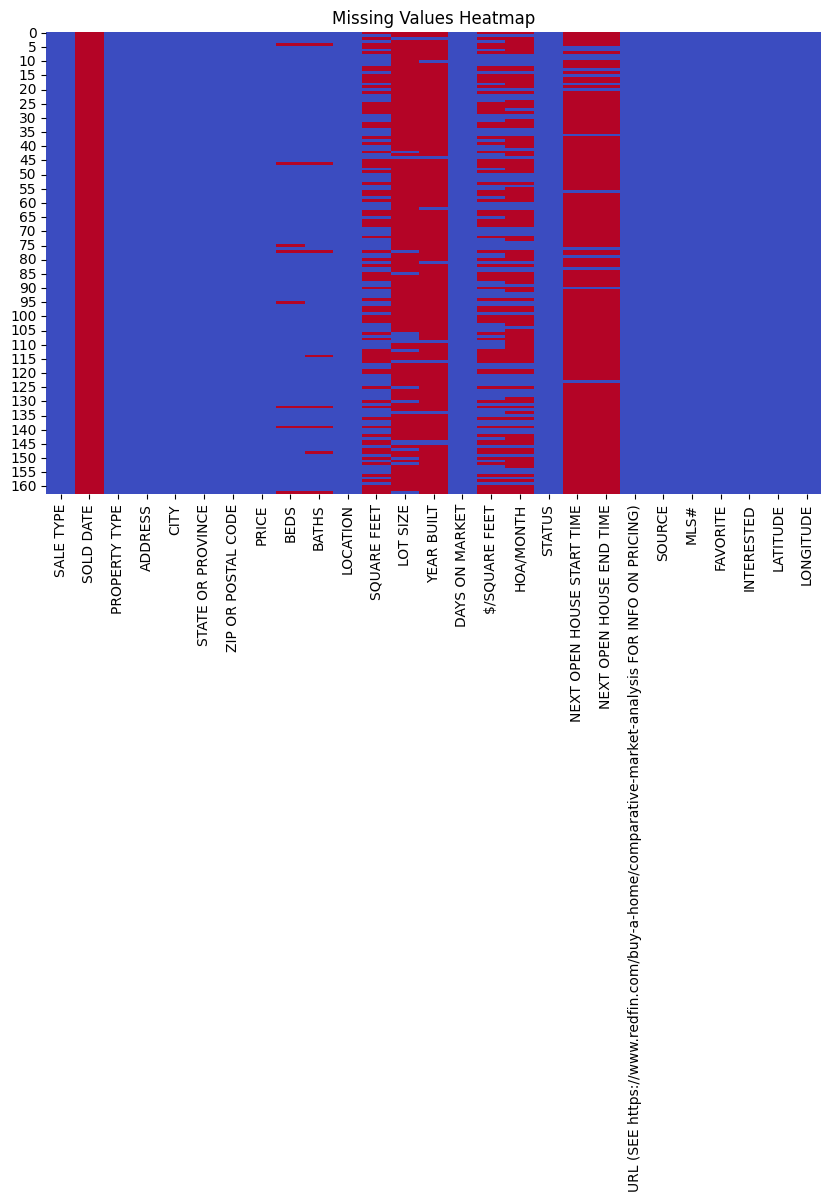

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), cbar=False,  cmap='coolwarm')

plt.title('Missing Values Heatmap')

plt.show()

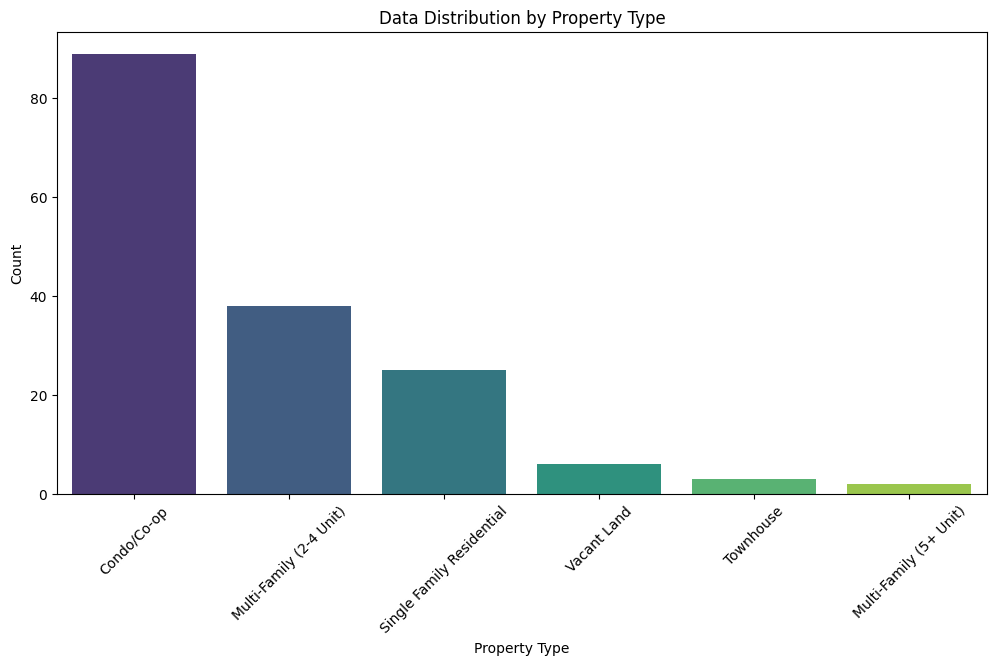

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='PROPERTY TYPE', palette='viridis', order=df['PROPERTY TYPE'].value_counts().index)


plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Data Distribution by Property Type')

plt.xticks(rotation=45)

plt.show()

In [ ]:
excluded_dataset = ['Vacant Land', 'Multi-Family (5+ Unit)', 'Townhouse']

selected_columns = selected_columns.loc[~selected_columns['PROPERTY TYPE'].isin(excluded_dataset)]

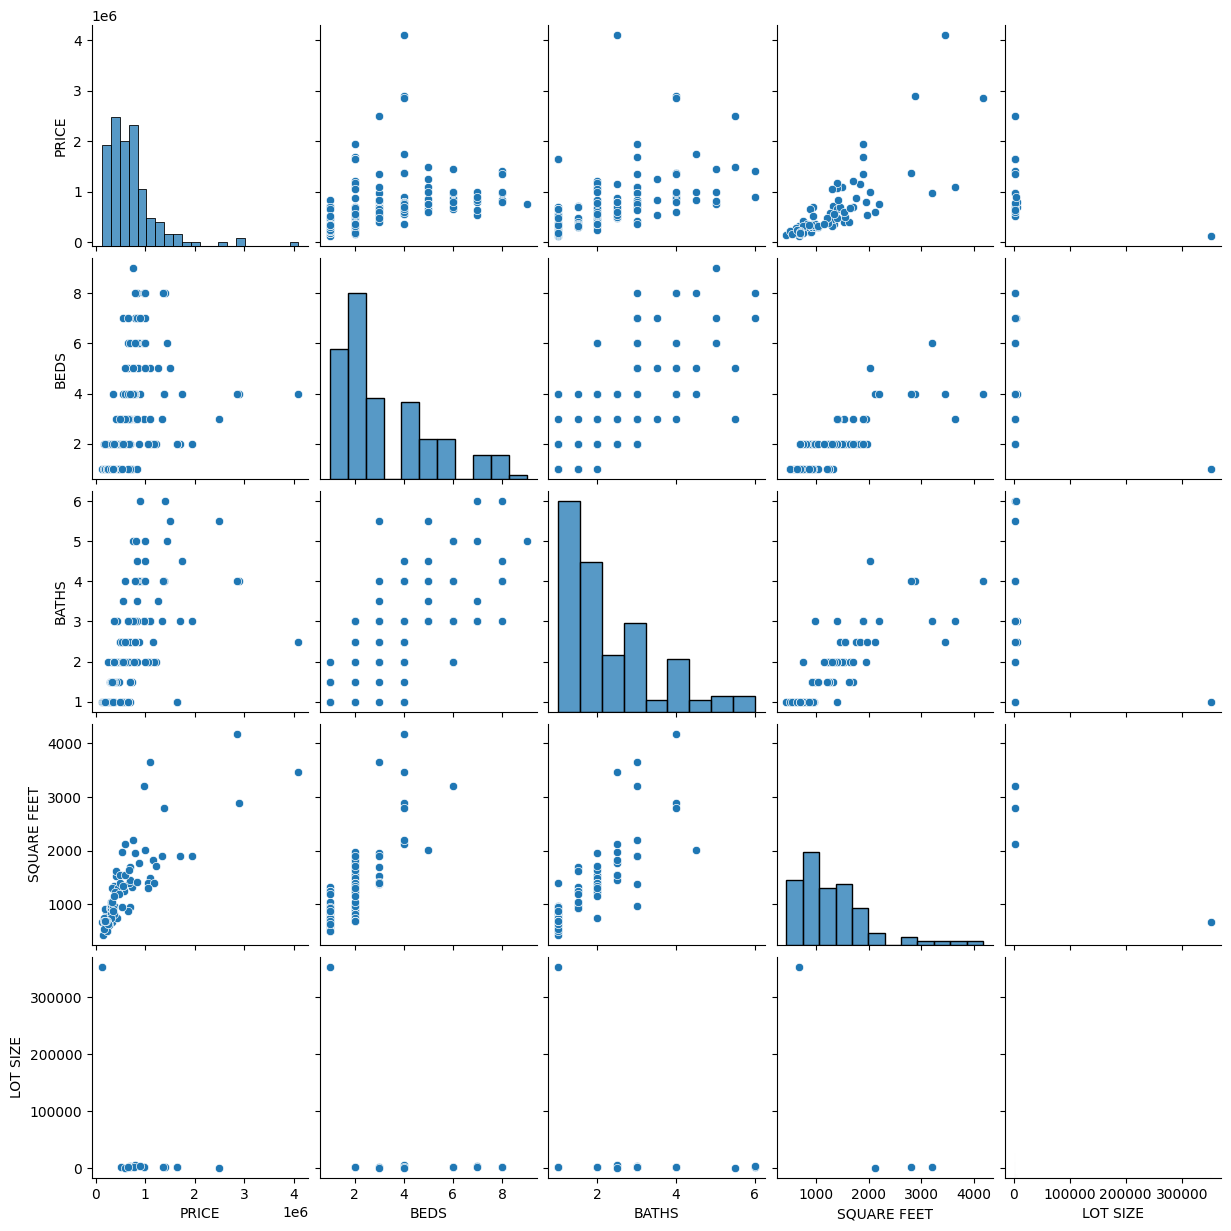

In [ ]:
sns.pairplot(selected_columns)

plt.show()

# **Price's Linear Relationship with Predictors (Horizontal Analyzation)**

# **Beds:**

**Linear Relationship**
  - Present

**Homoscedasticity**
  - Present

**Outliers**
  - Present

# **Baths**

**Linear Relationship**
  - Present

**Homoscedasticity**
  - Present

**Outliers**
  - Present

# **Square Feet**

**Linear Relationship**
  - Present

**Homoscedasticity**
  - Non-Present

**Outliers**
  - Present

# **Lot Size**
**Linear Relationship**
  - Present

**Homoscedasticity**
  - Present

**Outliers**
  - Present







  

In [ ]:
selected_columns.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,1.520000e+02,150.000000,152.000000,86.000000,18.000000
mean,7.188062e+05,3.126667,2.328947,1325.069767,22193.944444
std,5.503612e+05,2.011032,1.204442,715.958802,82525.297079
min,1.199000e+05,1.000000,1.000000,435.000000,1306.000000
25%,3.590000e+05,2.000000,1.500000,842.000000,2500.000000
50%,5.990000e+05,2.000000,2.000000,1250.500000,2500.000000
75%,8.547500e+05,4.000000,3.000000,1549.000000,2613.000000
max,4.100000e+06,9.000000,6.000000,4180.000000,352836.000000


In [ ]:
selected_columns.loc[selected_columns['SQUARE FEET'] <= 4000]
selected_columns.loc[selected_columns['LOT SIZE'] <= 100000]

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
2,Single Family Residential,515000,3.0,2.0,NaN,2613.0
42,Single Family Residential,699000,4.0,3.0,NaN,5001.0
85,Multi-Family (2-4 Unit),695000,6.0,3.0,NaN,2500.0
106,Multi-Family (2-4 Unit),980000,6.0,3.0,NaN,2500.0
107,Multi-Family (2-4 Unit),980000,6.0,3.0,3200.0,2613.0
108,Multi-Family (2-4 Unit),1375000,4.0,4.0,NaN,2500.0
109,Multi-Family (2-4 Unit),1375000,4.0,4.0,2800.0,2613.0
112,Single Family Residential,2500000,3.0,5.5,NaN,1398.0
116,Multi-Family (2-4 Unit),799000,4.0,2.5,NaN,5662.0
125,Multi-Family (2-4 Unit),1400000,8.0,6.0,NaN,2500.0


In [ ]:
imputed = selected_columns.fillna(selected_columns.mean(numeric_only=True))

In [ ]:
imputed.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,1.520000e+02,152.000000,152.000000,152.000000,152.000000
mean,7.188062e+05,3.126667,2.328947,1325.069767,22193.944444
std,5.503612e+05,1.997670,1.204442,537.166626,27690.008142
min,1.199000e+05,1.000000,1.000000,435.000000,1306.000000
25%,3.590000e+05,2.000000,1.500000,1045.750000,22193.944444
50%,5.990000e+05,2.000000,2.000000,1325.069767,22193.944444
75%,8.547500e+05,4.000000,3.000000,1325.069767,22193.944444
max,4.100000e+06,9.000000,6.000000,4180.000000,352836.000000


In [ ]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

In [ ]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [ ]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Single Family Residential'],
      dtype='object')

In [ ]:
re_prices.intercept_

-142756.9277548761

In [ ]:
re_prices.coef_

array([ 3.45410811e+04,  1.08779438e+05,  6.33632648e+02, -1.33364363e+01,
       -1.91112968e+05, -1.18351529e+04])

In [ ]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential
140,3.0,3.0,1903.0,22193.944444,0,0
76,2.0,2.0,1310.0,22193.944444,0,0
20,2.0,2.0,1250.0,22193.944444,0,0
51,2.0,2.0,1259.0,22193.944444,0,0
6,3.0,2.0,1959.0,22193.944444,0,0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  -2.108010670435395
MAE:  342753.090970586
RMSE:  742382.3953656347
Max error:  4400377.358657437


- Busniess would not tolrate such high error numbers, they would want to lose as little as they can in their business. Thus making the model performance unacceptable for practitioners due to MAE being a high number and RMSE even higher.